## Set Libraries

In [2]:
import pandas as pd
from scipy.stats import kstest
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Read in Lamb Weather Type Data
- Subset to only include data since 2000

In [40]:
lwt = pd.read_csv(r"D:\Annies_Dissertation\Analysis\weather\Lamb_weather_types.csv")

In [4]:
lwt = lwt[lwt.year > 2000]

In [5]:
lwt[:5]

,day,month,year,PM_1000,W,S,F,Z,G,Dir,LWT
47482,1,1,2001,-14.1,6.4,24.4,25.3,68.6,42.6,194.7,20
47483,2,1,2001,-9.2,9.5,2.4,9.8,81.6,42.0,255.6,20
47484,3,1,2001,-7.7,15.6,20.6,25.9,36.6,31.7,217.3,25
47485,4,1,2001,-6.6,8.4,2.3,8.7,53.4,28.1,254.4,20
47486,5,1,2001,-9.1,5.3,-3.0,6.1,52.7,27.0,299.9,20


## Read in PM2.5 data for Bournemouth and Southampton UA
- rename PM2.5 column to ensure easier identification 
- Specify the city code
- Merge based on the day, month and year
- Create boxplots showing the PM2.5 data for each LWT

In [6]:
AP = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Regression\Lamb\AP_Cities.csv')

In [7]:
AP = AP.rename(columns={'value': 'PM25'})

In [8]:
Soton_AP = AP.loc[AP['City'] == 'E06000045']

In [9]:
Soton_AP[:5]

,Unnamed: 0,time,City,PM25,month,year,day
2396,2692,2000-02-25,E06000045,14.118634,2,2000,25
2397,2693,2000-02-26,E06000045,20.691448,2,2000,26
2398,2694,2000-02-28,E06000045,20.323462,2,2000,28
2399,2696,2000-03-03,E06000045,17.397324,3,2000,3
2400,2697,2000-03-04,E06000045,16.998253,3,2000,4


In [10]:
Soton_lwt_AP = pd.merge(lwt, Soton_AP, on=['year', 'month', 'day'])

In [14]:
Soton_lwt_AP

,day,month,year,PM_1000,W,S,F,Z,G,Dir,LWT,Unnamed: 0,time,City,PM25
0,1,1,2001,-14.1,6.4,24.4,25.3,68.6,42.6,194.7,20,2820,2001-01-01,E06000045,23.167828
1,3,1,2001,-7.7,15.6,20.6,25.9,36.6,31.7,217.3,25,2821,2001-01-03,E06000045,15.653830
2,6,1,2001,-1.2,18.4,-2.6,18.6,47.0,30.0,278.1,20,2822,2001-01-06,E06000045,12.763431
3,7,1,2001,7.9,17.3,-11.2,20.6,38.0,28.0,303.0,27,2823,2001-01-07,E06000045,4.109682
4,8,1,2001,11.2,10.2,-8.3,13.2,0.3,13.2,309.0,17,2824,2001-01-08,E06000045,11.106216
5,12,1,2001,22.1,-9.7,9.7,13.7,-44.2,26.0,135.1,0,2825,2001-01-12,E06000045,2.855665
6,13,1,2001,25.9,-0.7,12.9,12.9,-38.2,23.0,176.9,0,2826,2001-01-13,E06000045,4.158072
7,14,1,2001,25.1,0.0,11.9,11.9,-56.0,30.4,179.8,0,2827,2001-01-14,E06000045,2.411402
8,15,1,2001,20.6,-1.7,12.2,12.3,-17.0,14.9,172.1,4,2828,2001-01-15,E06000045,12.294632
9,18,1,2001,18.8,-6.2,3.7,7.3,-8.2,8.3,120.6,3,2829,2001-01-18,E06000045,36.521584


In [30]:
Names = pd.read_csv(r'D:\Annies_Dissertation\Analysis\weather\LWT_names.csv')

In [31]:
Names[:5]

,LWT,LWT_Type
0,0,A
1,1,ANE
2,2,AE
3,3,ASE
4,4,AS


In [32]:
Soton_lwt_AP_N = Soton_lwt_AP.merge(Names, on='LWT', how = 'left')

In [33]:
Soton_lwt_AP_N[:5]

,day,month,year,PM_1000,W,S,F,Z,G,Dir,LWT,Unnamed: 0,time,City,PM25,LWT_Type
0,1,1,2001,-14.1,6.4,24.4,25.3,68.6,42.6,194.7,20,2820,2001-01-01,E06000045,23.167828,C
1,3,1,2001,-7.7,15.6,20.6,25.9,36.6,31.7,217.3,25,2821,2001-01-03,E06000045,15.653830,CSW
2,6,1,2001,-1.2,18.4,-2.6,18.6,47.0,30.0,278.1,20,2822,2001-01-06,E06000045,12.763431,C
3,7,1,2001,7.9,17.3,-11.2,20.6,38.0,28.0,303.0,27,2823,2001-01-07,E06000045,4.109682,CNW
4,8,1,2001,11.2,10.2,-8.3,13.2,0.3,13.2,309.0,17,2824,2001-01-08,E06000045,11.106216,NW


In [34]:
Soton_lwt_AP_N = Soton_lwt_AP_N[['day', 
                                 'month', 'year', 'LWT', 'City', 'PM25', 'LWT_Type' ]]

In [10]:
kstest(Soton_AP.PM25, 'norm')

KstestResult(statistic=0.98559972767235449, pvalue=0.0)

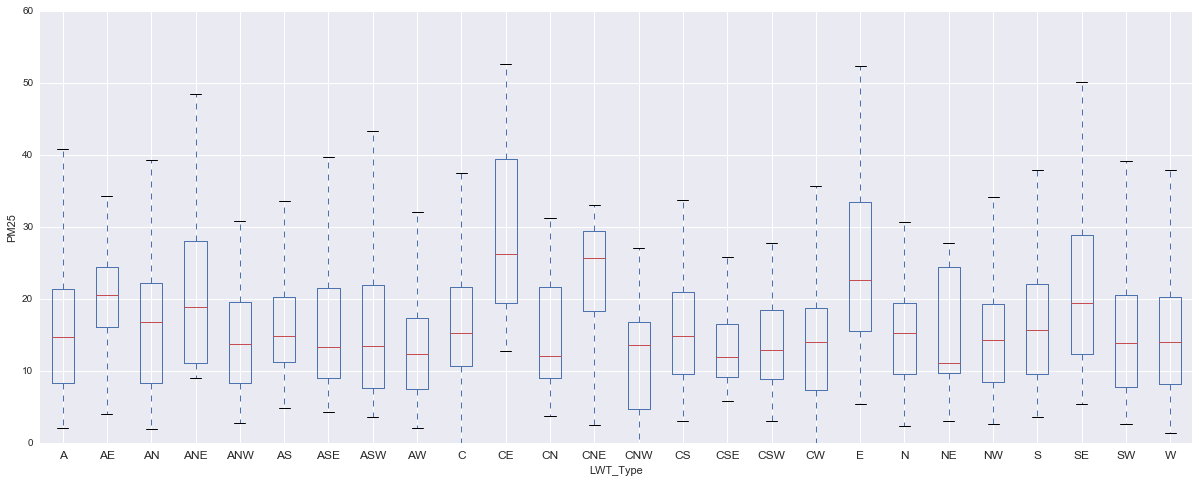

In [41]:
Soton_lwt_AP_N.boxplot(column='PM25', by='LWT_Type', showfliers=False, figsize=(20, 8))
plt.ylabel('PM25')
plt.title('')
plt.suptitle('')
plt.savefig(r'D:\Annies_Dissertation\Analysis\weather\Boxplot_soton_new.png')

In [23]:
Bmth_AP = AP.loc[AP['City'] == 'E06000028']

In [24]:
Bmth_lwt_AP = pd.merge(lwt, Bmth_AP, on=['year', 'month', 'day'])

In [36]:
Bmth_lwt_AP_N = Bmth_lwt_AP.merge(Names, on='LWT', how = 'left')

In [37]:
Bmth_lwt_AP_N[:5]

,day,month,year,PM_1000,W,S,F,Z,G,Dir,LWT,Unnamed: 0,time,City,PM25,LWT_Type
0,1,1,2001,-14.1,6.4,24.4,25.3,68.6,42.6,194.7,20,128,2001-01-01,E06000028,17.488951,C
1,7,1,2001,7.9,17.3,-11.2,20.6,38.0,28.0,303.0,27,131,2001-01-07,E06000028,6.870576,CNW
2,12,1,2001,22.1,-9.7,9.7,13.7,-44.2,26.0,135.1,0,133,2001-01-12,E06000028,3.535006,A
3,13,1,2001,25.9,-0.7,12.9,12.9,-38.2,23.0,176.9,0,134,2001-01-13,E06000028,8.494726,A
4,14,1,2001,25.1,0.0,11.9,11.9,-56.0,30.4,179.8,0,135,2001-01-14,E06000028,3.992900,A


In [38]:
Bmth_lwt_AP_N = Bmth_lwt_AP_N[['day', 
                                 'month', 'year', 'LWT', 'City', 'PM25', 'LWT_Type' ]]

In [15]:
Bmth_lwt_AP[:5]

,day,month,year,PM_1000,W,S,F,Z,G,Dir,LWT,Unnamed: 0,time,City,PM25
0,1,1,2001,-14.1,6.4,24.4,25.3,68.6,42.6,194.7,20,128,2001-01-01,E06000028,17.488951
1,7,1,2001,7.9,17.3,-11.2,20.6,38.0,28.0,303.0,27,131,2001-01-07,E06000028,6.870576
2,12,1,2001,22.1,-9.7,9.7,13.7,-44.2,26.0,135.1,0,133,2001-01-12,E06000028,3.535006
3,13,1,2001,25.9,-0.7,12.9,12.9,-38.2,23.0,176.9,0,134,2001-01-13,E06000028,8.494726
4,14,1,2001,25.1,0.0,11.9,11.9,-56.0,30.4,179.8,0,135,2001-01-14,E06000028,3.992900


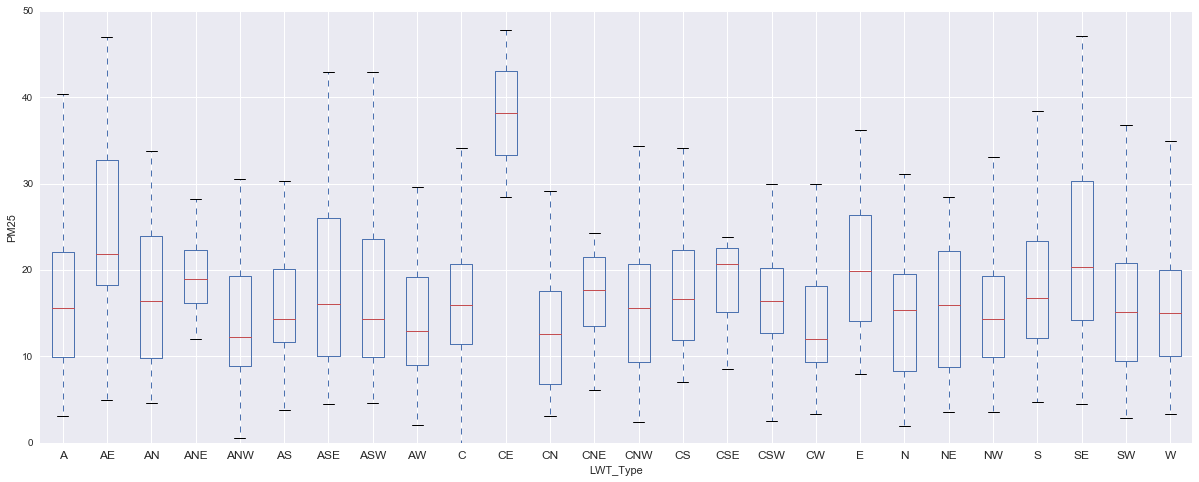

In [42]:
Bmth_lwt_AP_N.boxplot(column='PM25', by='LWT_Type', showfliers=False, figsize=(20, 8))
plt.ylabel('PM25')
plt.title('')
plt.suptitle('')
plt.savefig(r'D:\Annies_Dissertation\Analysis\weather\Boxplot_bmth_new.png')